In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Specify the file path
file_path = r'C:\Users\samka\upenn\Project 1\Katie_csv\ACSDT1Y2022.B06009-2024-02-13T015552.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)
desired_columns = [col for col in df.columns if any(state in col for state in ['Label (Grouping)', 'South Dakota!!Estimate', 'Minnesota!!Estimate', 'North Dakota!!Estimate', 'Louisiana!!Estimate', 'Mississippi!!Estimate', 'Oklahoma!!Estimate'])]
print(desired_columns)



['Label (Grouping)', 'Louisiana!!Estimate', 'Minnesota!!Estimate', 'Mississippi!!Estimate', 'North Dakota!!Estimate', 'Oklahoma!!Estimate', 'South Dakota!!Estimate']


In [3]:
#state_columns = [col for col in df.columns if '|Estimate' in col]
state_df = df[desired_columns]
desired_rows_df = state_df.iloc[:6]
print(desired_rows_df)

                                  Label (Grouping) Louisiana!!Estimate  \
0                                           Total:           3,096,121   
1                   Less than high school graduate             393,283   
2      High school graduate (includes equivalency)           1,006,184   
3               Some college or associate's degree             856,548   
4                                Bachelor's degree             525,044   
5                  Graduate or professional degree             315,062   

  Minnesota!!Estimate Mississippi!!Estimate North Dakota!!Estimate  \
0           3,918,565             1,963,322                514,786   
1             233,881               243,526                 31,578   
2             917,132               604,163                131,842   
3           1,233,841               629,447                187,525   
4             995,083               297,480                115,034   
5             538,628               188,706                 4

In [4]:
# Define the column mapping for renaming
column_mapping = {
    'Label (Grouping)': 'Label',
    'Louisiana!!Estimate': 'Louisiana',
    'Minnesota!!Estimate': 'Minnesota',
    'Mississippi!!Estimate': 'Mississippi',
    'North Dakota!!Estimate': 'North Dakota',
    'Oklahoma!!Estimate': 'Oklahoma',
    'South Dakota!!Estimate': 'South Dakota'
}

# Select the desired columns from the DataFrame and rename them
desired_rows_df = df[['Label (Grouping)', 'Louisiana!!Estimate','Mississippi!!Estimate', 'Oklahoma!!Estimate', 'Minnesota!!Estimate', 'North Dakota!!Estimate', 'South Dakota!!Estimate']].copy()
desired_rows_df.columns = [column_mapping.get(col, col) for col in desired_rows_df.columns]

# Take the first 6 rows
desired_rows_df = desired_rows_df.iloc[:6]

# Print the resulting DataFrame
print(desired_rows_df)

                                             Label  Louisiana Mississippi  \
0                                           Total:  3,096,121   1,963,322   
1                   Less than high school graduate    393,283     243,526   
2      High school graduate (includes equivalency)  1,006,184     604,163   
3               Some college or associate's degree    856,548     629,447   
4                                Bachelor's degree    525,044     297,480   
5                  Graduate or professional degree    315,062     188,706   

    Oklahoma  Minnesota North Dakota South Dakota  
0  2,661,141  3,918,565      514,786      605,735  
1    277,868    233,881       31,578       41,373  
2    813,545    917,132      131,842      177,171  
3    810,811  1,233,841      187,525      195,874  
4    495,467    995,083      115,034      131,481  
5    263,450    538,628       48,807       59,836  


In [5]:
# Print the DataFrame to a file
desired_rows_df.to_csv('desired_rows.csv', index=True)

# Or print the DataFrame to string with specified line width
print(desired_rows_df.to_string(index=False, line_width=2000))

                                          Label Louisiana Mississippi  Oklahoma Minnesota North Dakota South Dakota
                                         Total: 3,096,121   1,963,322 2,661,141 3,918,565      514,786      605,735
                 Less than high school graduate   393,283     243,526   277,868   233,881       31,578       41,373
    High school graduate (includes equivalency) 1,006,184     604,163   813,545   917,132      131,842      177,171
             Some college or associate's degree   856,548     629,447   810,811 1,233,841      187,525      195,874
                              Bachelor's degree   525,044     297,480   495,467   995,083      115,034      131,481
                Graduate or professional degree   315,062     188,706   263,450   538,628       48,807       59,836


In [6]:
desired_columns = ['Label', 'Louisiana', 'Mississippi', 'Oklahoma']
specific_states_df = desired_rows_df.loc[:, desired_columns]

print(specific_states_df)

                                             Label  Louisiana Mississippi  \
0                                           Total:  3,096,121   1,963,322   
1                   Less than high school graduate    393,283     243,526   
2      High school graduate (includes equivalency)  1,006,184     604,163   
3               Some college or associate's degree    856,548     629,447   
4                                Bachelor's degree    525,044     297,480   
5                  Graduate or professional degree    315,062     188,706   

    Oklahoma  
0  2,661,141  
1    277,868  
2    813,545  
3    810,811  
4    495,467  
5    263,450  


In [8]:
total_pop_had = specific_states_df.iloc[0][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
print("Total for the first row:", total_pop_had)

Total for the first row: 7720584


In [9]:
# Convert data to numeric and sum the values across the specified columns for the first row
total_less_than_hs_had = specific_states_df.iloc[1][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()

# Convert total_pop_of_high_anxdep to an integer (if needed)
#total_pop_of_high_anxdep = total_pop_of_high_anxdep.replace(',', '').astype(int)

# Calculate the percentage
percent_of_less_than_hs_had = (total_less_than_hs_had / total_pop_of_had) * 100

# Round the percentage and format as a string with a percent symbol
rounded_percent = round(percent_of_less_than_hs_had)
percent_string = f"{rounded_percent}%"

print("Percentage of people with less than high school degrees in states with high anxiety and depression:", percent_string)

Percentage of people with less than high school degrees in states with high anxiety and depression: 12%


In [10]:
total_hs_had = specific_states_df.iloc[2][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_of_hs_had = (total_hs_had / total_pop_of_had) * 100

rounded_percent = round(percent_of_hs_had)
percent_string = f"{rounded_percent}%"

print("Percentage of people with high school degrees in states with high anxiety and depression:", percent_string)

Percentage of people with high school degrees in states with high anxiety and depression: 31%


In [11]:
total_with_some_college_had = specific_states_df.iloc[3][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_of_some_college_had = (total_with_some_college_had / total_pop_of_had) * 100

rounded_percent = round(percent_of_some_college_had)
percent_string = f"{rounded_percent}%"

print("Percentage of people with some college education in states with high anxiety and depression:", percent_string)

Percentage of people with some college education in states with high anxiety and depression: 30%


In [12]:
total_with_bachelor_had = specific_states_df.iloc[4][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_of_bachelor_had = (total_with_bachelor_had / total_pop_of_had) * 100

rounded_percent = round(percent_of_bachelor_had)
percent_string = f"{rounded_percent}%"

print("Percentage of people with bachelor degrees in states with high anxiety and depression:", percent_string)

Percentage of people with bachelor degrees in states with high anxiety and depression: 17%


In [13]:
total_with_graduate_had = specific_states_df.iloc[5][['Louisiana', 'Mississippi', 'Oklahoma']].str.replace(',', '').astype(int).sum()
percent_with_graduate_had = (total_with_graduate_had / total_pop_of_had) * 100

rounded_percent = round(percent_with_graduate_had)
percent_string = f"{rounded_percent}%"

print("Percentage of people with graduate degree in states with high anxiety and depression:", percent_string)

Percentage of people with graduate degree in states with high anxiety and depression: 10%


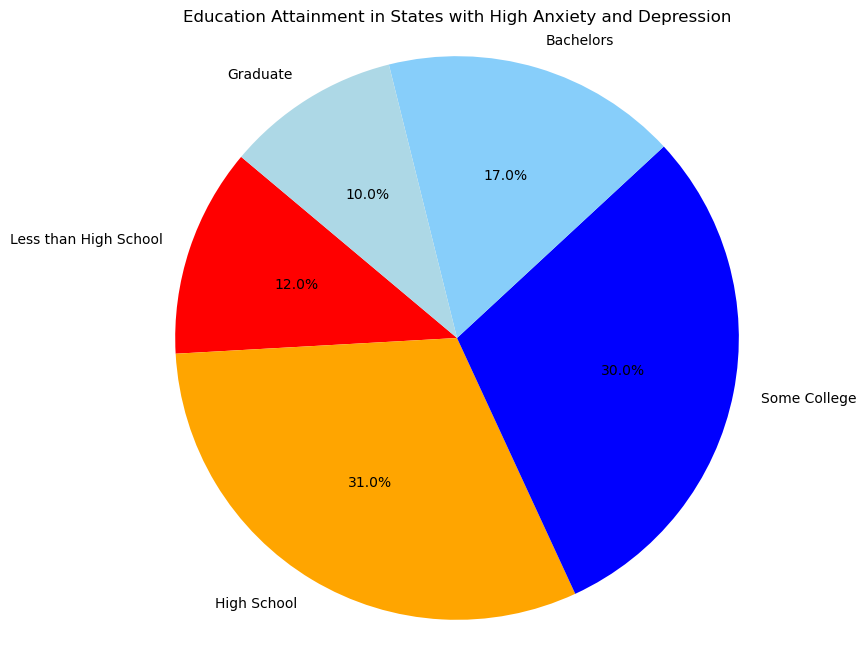

In [14]:
# Given data
percent_of_less_than_hs_had = 12
percent_of_hs_had = 31
percent_of_some_college_had = 30
percent_of_bachelor_had = 17
percent_with_graduate_had = 10  # Replace this value with your actual percentage

# Define custom labels
labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  # Adjust labels as needed
sizes = [12, 31, 30, 17, 10]
colors = ["red", "orange", "blue", "lightskyblue", "lightblue"]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Add a title
plt.title("Education Attainment in States with High Anxiety and Depression")

# Show the pie chart
plt.show()

In [16]:
#Information for states with the lowest rate of anxiety and depression 
desired_columns = ['Label', 'Minnesota', 'North Dakota', 'South Dakota']
specific_states_df = desired_rows_df.loc[:, desired_columns]

print(specific_states_df)

                                             Label  Minnesota North Dakota  \
0                                           Total:  3,918,565      514,786   
1                   Less than high school graduate    233,881       31,578   
2      High school graduate (includes equivalency)    917,132      131,842   
3               Some college or associate's degree  1,233,841      187,525   
4                                Bachelor's degree    995,083      115,034   
5                  Graduate or professional degree    538,628       48,807   

  South Dakota  
0      605,735  
1       41,373  
2      177,171  
3      195,874  
4      131,481  
5       59,836  


In [17]:
total_pop_of_lad = specific_states_df.iloc[0][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
print("Total for the first row:", total_pop_of_lad)

Total for the first row: 5039086


In [18]:
# Convert data to numeric and sum the values across the specified columns for the first row
total_less_than_hs_lad = specific_states_df.iloc[1][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()

# Convert total_pop_of_high_anxdep to an integer (if needed)
#total_pop_of_high_anxdep = total_pop_of_high_anxdep.replace(',', '').astype(int)

# Calculate the percentage
percent_of_less_than_hs_lad = (total_less_than_hs_lad / total_pop_of_lad) * 100

# Round the percentage and format as a string with a percent symbol
rounded_percent = round(percent_of_less_than_hs_lad)
percent_string = f"{rounded_percent}%"

print("Percentage of people with less than high school degrees in states with low anxiety and depression:", percent_string)

Percentage of people with less than high school degrees in states with low anxiety and depression: 6%


In [19]:
total_hs_lad = specific_states_df.iloc[2][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_of_hs_lad = (total_hs_lad / total_pop_of_lad) * 100

rounded_percent = round(percent_of_hs_lad)
percent_string = f"{rounded_percent}%"

print("Percentage of people with high school degrees in states with low anxiety and depression:", percent_string)

Percentage of people with high school degrees in states with low anxiety and depression: 24%


In [20]:
total_with_some_college_lad = specific_states_df.iloc[3][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_of_some_college_lad = (total_with_some_college_lad / total_pop_of_lad) * 100

rounded_percent = round(percent_of_some_college_lad)
percent_string = f"{rounded_percent}%"

print("Percentage of people with some college education in states with low anxiety and depression:", percent_string)

Percentage of people with some college education in states with low anxiety and depression: 32%


In [21]:
total_with_bachelor_lad = specific_states_df.iloc[4][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_of_bachelor_lad = (total_with_bachelor_lad / total_pop_of_lad) * 100

rounded_percent = round(percent_of_bachelor_lad)
percent_string = f"{rounded_percent}%"

print("Percentage of people with bachelor degrees in states with low anxiety and depression:", percent_string)

Percentage of people with bachelor degrees in states with low anxiety and depression: 25%


In [22]:
total_with_graduate_lad = specific_states_df.iloc[5][['Minnesota', 'North Dakota', 'South Dakota']].str.replace(',', '').astype(int).sum()
percent_with_graduate_lad = (total_with_graduate_lad / total_pop_of_lad) * 100

rounded_percent = round(percent_with_graduate_lad)
percent_string = f"{rounded_percent}%"

print("Percentage of people with graduate degree in states with low anxiety and depression:", percent_string)

Percentage of people with graduate degree in states with low anxiety and depression: 13%


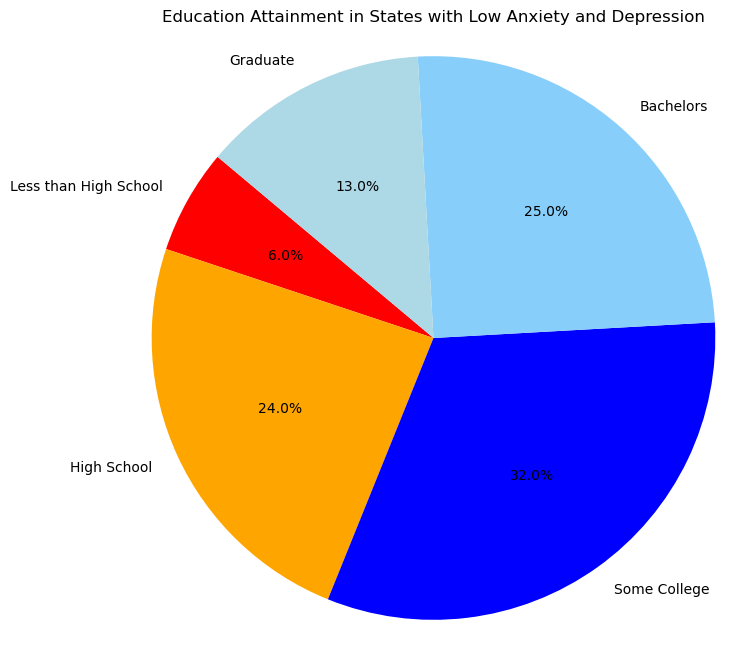

In [23]:
# Given data
percent_of_less_than_hs_lad = 6
percent_of_hs_lad = 24
percent_of_some_college_lad = 32
percent_of_bachelor_lad = 25
percent_with_graduate_lad = 13  # Replace this value with your actual percentage

# Define custom labels
labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  # Adjust labels as needed
sizes = [6, 24, 32, 25, 13]
colors = ["red", "orange", "blue", "lightskyblue", "lightblue"]

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis("equal")

# Add a title
plt.title("Education Attainment in States with Low Anxiety and Depression")

# Show the pie chart
plt.show()

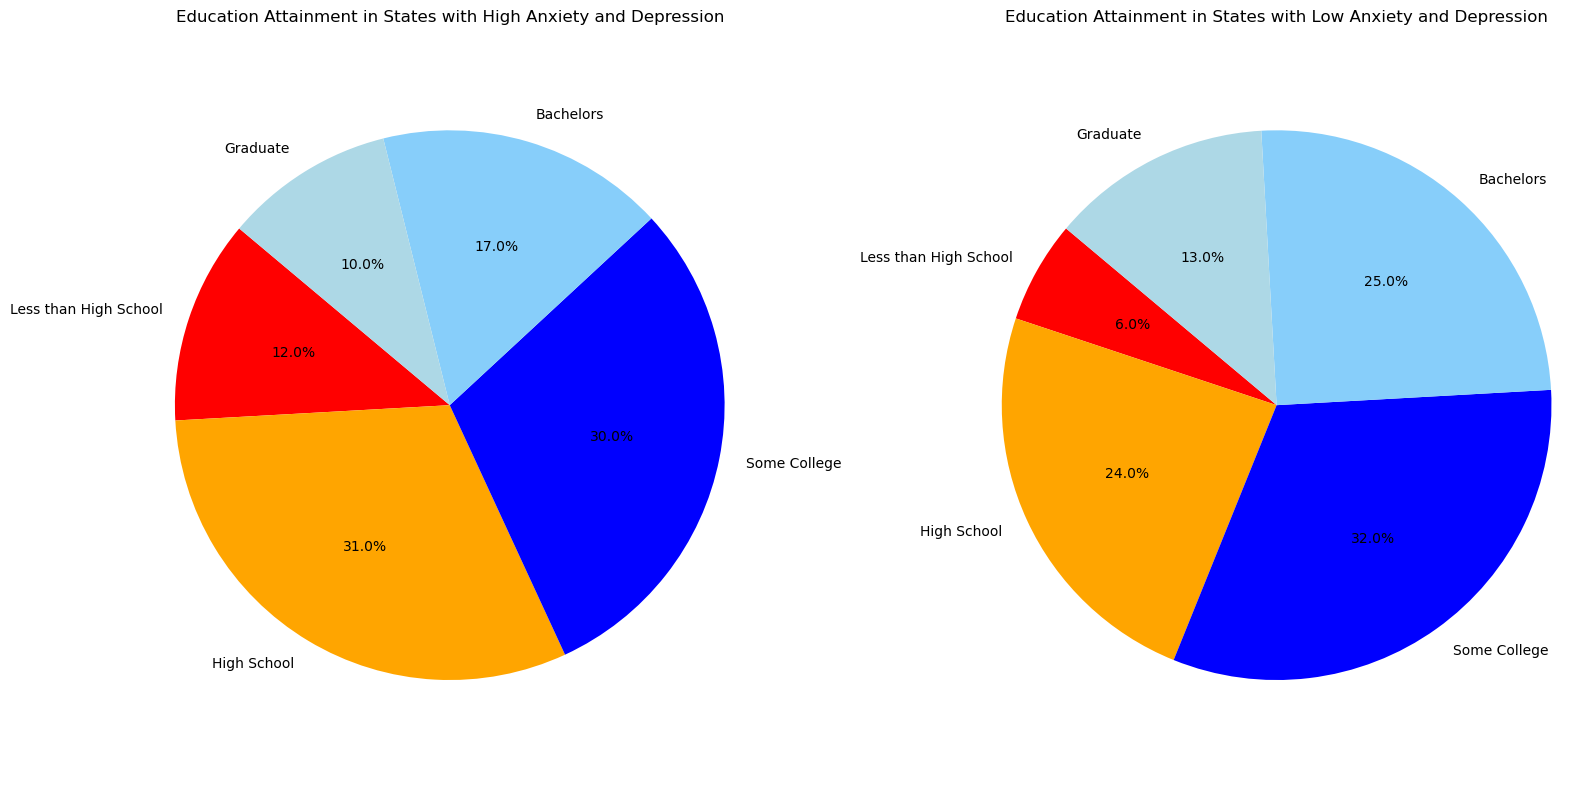

In [24]:
# First pie chart
percent_of_less_than_hs_had = 12
percent_of_hs_had = 31
percent_of_some_college_had = 30
percent_of_bachelor_had = 17
percent_with_graduate_had = 10  # Replace this value with your actual percentage

# Define custom labels
labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  # Adjust labels as needed
sizes = [12, 31, 30, 17, 10]
colors = ["red", "orange", "blue", "lightskyblue", "lightblue"]

# Create the first pie chart
plt.figure(figsize=(16, 8))  # Increase figure width to accommodate both pie charts
plt.subplot(1, 2, 1)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Education Attainment in States with High Anxiety and Depression")

# Second pie chart
percent_of_less_than_hs_lad = 6
percent_of_hs_lad = 24
percent_of_some_college_lad = 32
percent_of_bachelor_lad = 25
percent_with_graduate_lad = 13  # Replace this value with your actual percentage

# Define custom labels
labels_low = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]  # Adjust labels as needed
sizes_low = [6, 24, 32, 25, 13]
colors_low = ["red", "orange", "blue", "lightskyblue", "lightblue"]

# Create the second pie chart
plt.subplot(1, 2, 2)
plt.pie(sizes_low, labels=labels_low, colors=colors_low, autopct='%1.1f%%', startangle=140)
plt.axis("equal")
plt.title("Education Attainment in States with Low Anxiety and Depression")

# Show both pie charts
plt.tight_layout()
plt.show()

##Brief summary of pie chart findings

For the 3 states with high anxiety and depression levels, the percent of people with high school or less education is 43% compared to 30% in states with low anxiety and depression.  The 3 states with high levels of anxiety and depression had 57% of the population with some college or higher education as compared to 70% in the 3 states with low levels of anxiety and depression.

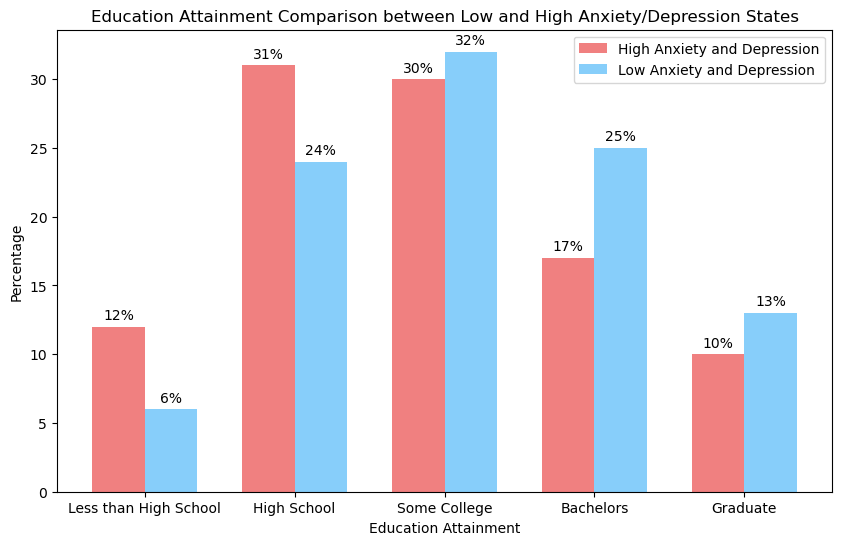

In [30]:
percent_of_less_than_hs_had_1 = 12
percent_of_hs_had_1 = 31
percent_of_some_college_hda_1 = 30
percent_of_bachelor_had_1 = 17
percent_with_graduate_had_1 = 10 

percent_of_less_than_lad_2 = 6
percent_of_hs_lad_2 = 24
percent_of_some_college_lad_2 = 32
percent_of_bachelor_lad_2 = 25
percent_with_graduate_lad_2 = 13

# Define custom labels
labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]
x = np.arange(len(labels))
width = 0.35  # width of the bars

# Define percentage values for the bars
percentages_set1 = [percent_of_less_than_hs_had_1, percent_of_hs_had_1, 
                    percent_of_some_college_hda_1, percent_of_bachelor_had_1, 
                    percent_with_graduate_had_1]
percentages_set2 = [percent_of_less_than_lad_2, percent_of_hs_lad_2, 
                    percent_of_some_college_lad_2, percent_of_bachelor_lad_2, 
                    percent_with_graduate_lad_2]

# Define sizes for the two sets
sizes_1 = [percent_of_less_than_hs_had_1, percent_of_hs_had_1, 
           percent_of_some_college_hda_1, percent_of_bachelor_had_1, 
           percent_with_graduate_had_1]
sizes_2 = [percent_of_less_than_lad_2, percent_of_hs_lad_2, 
           percent_of_some_college_lad_2, percent_of_bachelor_lad_2, 
           percent_with_graduate_lad_2]

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, sizes_1, width, label='High Anxiety and Depression', color='lightcoral')
rects2 = ax.bar(x + width/2, sizes_2, width, label='Low Anxiety and Depression', color='lightskyblue')

# Add labels and title
ax.set_xlabel('Education Attainment')
ax.set_ylabel('Percentage')
ax.set_title('Education Attainment Comparison between Low and High Anxiety/Depression States')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add percentage numbers to each bar
def autolabel(rects, percentages):
    for rect, percentage in zip(rects, percentages):
        height = rect.get_height()
        ax.annotate('{}%'.format(percentage),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects2, percentages_set2)
autolabel(rects1, percentages_set1)

plt.show()

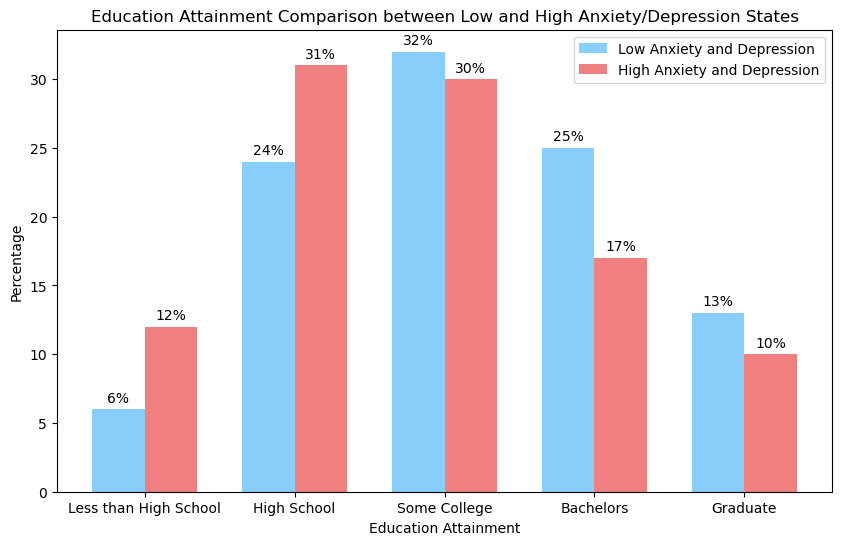

In [37]:
percent_of_less_than_hs_had_1 = 12
percent_of_hs_had_1 = 31
percent_of_some_college_hda_1 = 30
percent_of_bachelor_had_1 = 17
percent_with_graduate_had_1 = 10 

percent_of_less_than_lad_2 = 6
percent_of_hs_lad_2 = 24
percent_of_some_college_lad_2 = 32
percent_of_bachelor_lad_2 = 25
percent_with_graduate_lad_2 = 13

# Define custom labels
labels = ["Less than High School", "High School", "Some College", "Bachelors", "Graduate"]
x = np.arange(len(labels))
width = 0.35  # width of the bars

# Define percentage values for the bars
percentages_set1 = [percent_of_less_than_lad_2, percent_of_hs_lad_2, 
                    percent_of_some_college_lad_2, percent_of_bachelor_lad_2, 
                    percent_with_graduate_lad_2]
percentages_set2 = [percent_of_less_than_hs_had_1, percent_of_hs_had_1, 
                    percent_of_some_college_hda_1, percent_of_bachelor_had_1, 
                    percent_with_graduate_had_1]

# Define sizes for the two sets
sizes_1 = [percent_of_less_than_lad_2, percent_of_hs_lad_2, 
           percent_of_some_college_lad_2, percent_of_bachelor_lad_2, 
           percent_with_graduate_lad_2]
sizes_2 = [percent_of_less_than_hs_had_1, percent_of_hs_had_1, 
           percent_of_some_college_hda_1, percent_of_bachelor_had_1, 
           percent_with_graduate_had_1]

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, sizes_1, width, label='Low Anxiety and Depression', color='lightskyblue')
rects2 = ax.bar(x + width/2, sizes_2, width, label='High Anxiety and Depression', color='lightcoral')

# Add labels and title
ax.set_xlabel('Education Attainment')
ax.set_ylabel('Percentage')
ax.set_title('Education Attainment Comparison between Low and High Anxiety/Depression States')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Add percentage numbers to each bar
def autolabel(rects, percentages):
    for rect, percentage in zip(rects, percentages):
        height = rect.get_height()
        ax.annotate('{}%'.format(percentage),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, percentages_set1)
autolabel(rects2, percentages_set2)

plt.show()